# Multiple Linear Regression: Construction, Assumptions & Evaluation

**Multiple Linear Regression** is a modeling technique that uses two or more variables to predict a continuous variable. The variable that is being predicted is called the dependent variable, while the variables that are used to predict is called the independent variables. These independent variables can be continuous as well as categorical. <br>
**Why is it called "Multiple" Linear Regression?** Because it considers "2 or more" independent variables to predict the dependent variable. <br>
**Why is it called Multiple "Linear" Regression?** Because the dependent and the independent variables have a "linear" relationship between them. If one increases by certain units, the other either increases or decreases by certain units depending on whether they have a positive linear relationship between them or a negative linear relationship between them. <br>
**Why is it called Multiple Linear "Regression"?** Because the dependent variable is a continuous variable.

I will be working on a **Sales and Market Campaigning Dataset**. This dataset will tell us a company's marketing spend on different typesof marketing. Namely TV, Radio and Social Media. This dataset also includes the Sales number taken over a period period of time.

**Construction:** For the construction part I will be using the Ordinary Least Square (OLS) Method of construction. The OLS method constructs a line from which the sum of the squares of the distance from data points is the least. Following steps will be taken to construct the model:
* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model

**Assumptions:** There are 4 important assumptions that are considered in Simple Linear Regression:
1. Linearity: The dependent and independent variable have a linear relationship between them.
2. Independence: All the samples that have been recorded are independent of each other.
3. Normality: The difference between the predicted and actual value of dependent variable for a particular independent variable is called a Residue. Normality assumption states that the Residuals are normally distributed.
4. Homoscedasticity: The Homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X.
5. No multicolinearity: The independent variables will not have any kind of linear relationship amongst them.

Although assumptions are always considered before the model is constructed, some assumptions can only be checked once the model is built. Out of the above mentioned assumptions, Linearity, Independence and No multicolinearity are checked before the model is built, and Normality and Homoscedasticity are checked after the model is built as they involve residuals and residuals can only be calculated after the model is built.

**Evaluation:** For the evaluation part we will try to predict the uncertainity around our model. We will also evaluate how well our dependent and independent variables are related to each other.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Construction

#### Exploring

We can make some observations about the features in different columns from the above 5 rows. The features in the data are:
* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

#### Using plots and descriptive statistics

We can check which continuous independent variable have a linear relationship with our continuous dependent variable.

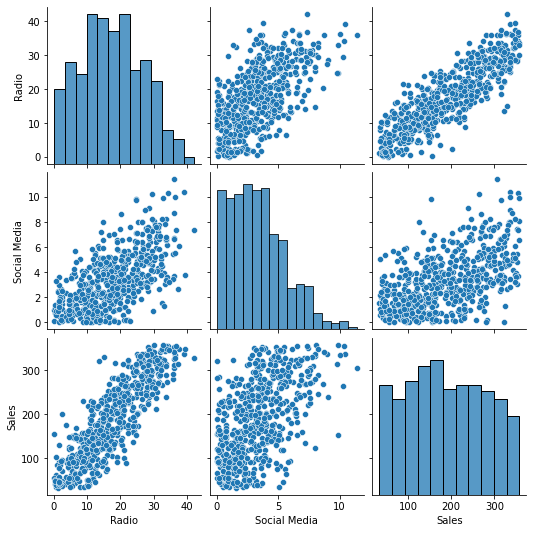

In [3]:
sns.pairplot(data)
plt.show()

Seems like `Sales` has a linear relationship with both `Radio` and `Social Media` continuous variables. But it seems like there is a more clear linear relationship between `Sales` and `Radio` than `Sales` and `Social Media`.

We can also check the relationship between Sales and other two categorical variables.
To do this, we can take the average `Sales` for each features of both variables.

In [4]:
print(data[["TV", "Sales"]].groupby(["TV"]).mean().reset_index())

print()

print(data[["Influencer", "Sales"]].groupby(["Influencer"]).mean().reset_index())

       TV       Sales
0    High  300.853195
1     Low   90.984101
2  Medium  195.358032

  Influencer       Sales
0      Macro  181.670070
1       Mega  194.487941
2      Micro  188.321846
3       Nano  191.874432


There are two observations we can make:
1. As the `TV` budget increases, the average `Sales` also increases. Not only this, but if we observe the increase in `Sales` for every `TV` budget increase, we can see it is approximately 105 million dollars. So we can say, the relationship between `TV` and `Sales` is somewhat linear.
2. There seems to be like a flat relationship between `Influencer` type and `Sales`

So, the choice is clear. We will choose `TV` as our other independent variable.

#### Cleaning

Let us **remove all the missing values**.

In [5]:
data = data.dropna(axis=1)

Although we are using `Radio` as our independent continuous variable, but if we had choosen `Social Media` over `Radio` then we might have faced one problem. The problem arises from the fact that the `ols()` function doesn't run when variable names contain a space. `Social Media` contains a space and we had to fix it in order to use it as our independent variable in our OLS formula.

In [6]:
data.rename(columns={'Social Media' : 'Social_Media'}, inplace=True)
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


#### Creating and fitting Multiple Linear Regression Model

As per our previous observations, we chose `Radio` as our independent continuous variable and `TV` as our independent categorical variable to predict `Sales`

In [7]:
ols_formula = "Sales ~ Radio + C(TV)"
OLS = ols(data=data, formula=ols_formula)
model = OLS.fit()

details = model.summary()
details

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          1.63e-288
Time:                        09:34:27   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumptions

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

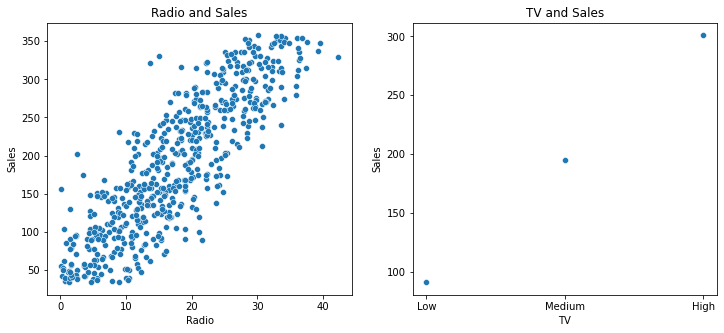

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))

sns.scatterplot(data=data, x='Radio', y='Sales', ax=axes[0])
axes[0].set_title("Radio and Sales")

tv_sales = data[["TV", "Sales"]].groupby(["TV"]).mean().reset_index()
tv_sales['TV'] = pd.Categorical(tv_sales['TV'], ['Low', 'Medium', 'High'])

sns.scatterplot(data=tv_sales, x='TV', y = 'Sales', ax=axes[1])
axes[1].set_title("TV and Sales")

plt.show()

It is pretty evident from the scatterplots that the linearity assumption is met.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

We can create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

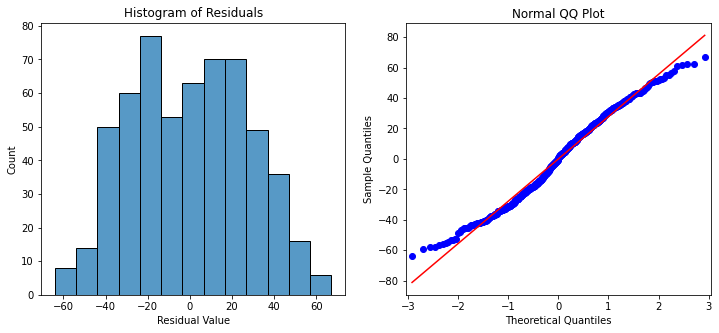

In [9]:
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (12,5))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")

plt.show()

It is pretty much evident from both these graphs that the normality assumption is met.

### Model assumption: Homoscedasticity

The homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X.

We can check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. We will add a line at y=0 to visualize the variance of residuals above and below y=0.

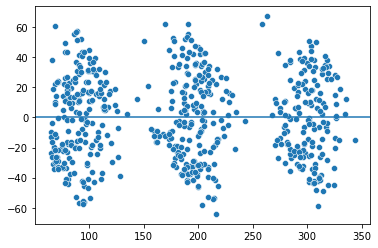

In [10]:
X = data[['Radio', 'TV']]
fitted_values = model.predict(X)

sns.scatterplot(y=residuals, x=fitted_values)
plt.axhline(y=0)
plt.show()

The graph shows that the residuals are not skewed to any one side and that they are quite uniformally distributed. So, yes the homoscedasticity assumption is met.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

We will first use the first method to check multicolinearity i.e. using scatterplots.

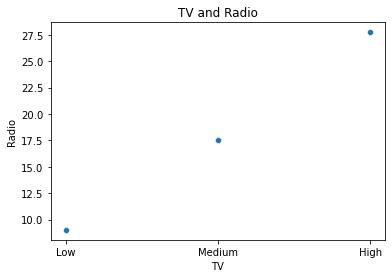

In [11]:
tv_radio = data[["TV", "Radio"]].groupby(["TV"]).mean().reset_index()
tv_radio['TV'] = pd.Categorical(tv_radio['TV'], ['Low', 'Medium', 'High'])

sns.scatterplot(data=tv_radio, x='TV', y='Radio')
plt.title("TV and Radio")

plt.show()

It does seem like the "no multicollinearity" assumption is not met in this case. It is very important for a Data Professional to let the stakeholders know the limitations and uncertainity of their Regression Model. In this case, it will be "no multicollinearity" assumption.

Although we can not check the VIF between a categorical and a continuous variable, but just for the sake of our knowledge, we will check the **Variation Inflation Factor (VIF)** for our two continuous independent variables, `Radio` and `Social_Media`.

In [12]:
X = data[['Radio', 'Social_Media']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
Radio,5.170922
Social_Media,5.170922


How do we interpret the VIF score?
* VIF equal to 1 = variables are not correlated
* VIF between 1 and 5 = variables are moderately correlated 
* VIF greater than 5 = variables are highly correlated

This shows that if we had considered `Radio` and `Social_Media` as our independent variables then they would have been moderately to highly correlated.

## Evaluation

In [13]:
details

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          1.63e-288
Time:                        09:34:27   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Uncertainity:**
* TV (Low) has a p-value of $0.00$ and at a confidence level of $95%$ it has a confidence interval of $[-163.979, -144.616]$. This means that there's a $95%$ of chance the interval $[-163.979, -144.616]$ contains the true parameter value of the slope.
* TV (Medium) has a p-value of $0.00$ and at a confidence level of $95%$ it has a confidence interval of $[-82.431, -68.193]$. This means that there's a $95%$ of chance the interval $[-82.431, -68.193]$ contains the true parameter value of the slope.
* Radio has a p-value of $0.00$ and at a confidence level of $95%$ it has a confidence interval of $[2.551, 3.383]$. This means that there's a $95%$ of chance the interval $[2.551, 3.383]$ contains the true parameter value of the slope.

**Relation:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). Using `TV` and `Radio` as X results in a multiple linear regression model with $R^{2} = 0.904$. In other words, TV explains $90.4%$ of the variation in Sales. The R-squared value will depend on the variables selected for X.

## Conclusion and Result

$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$